# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [229]:
# Import the appropriate libraries with aliases
import pandas as pd


# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [230]:
#Code Used:

df = north_df["Rep ID"].drop_duplicates()
len(df.index)


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [231]:
#Code Used:
df = south_df["Rep ID"].drop_duplicates()
len(df.index)

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [66]:
#Code Used:
#north_df.describe()
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(3)






Busy Minutes             9.988
Not Ready Minutes        1.914
Incoming Wait Time       3.049
During Call Wait Time    2.967
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [97]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(3)

Busy Minutes             10.054
Not Ready Minutes         1.911
Incoming Wait Time        3.000
During Call Wait Time     3.076
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
total_df = pd.concat([north_df,south_df])
total_df[total_df['Incoming or Outgoing'] =='Incoming']['Time Block'].value_counts()

12:00 PM    43
10:00 AM    33
3:00 PM     32
2:00 PM     25
4:00 PM     22
11:00 AM    19
1:00 PM     15
5:00 PM     14
9:00 AM      5
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.988
> - Not Ready Minutes = 1.914
> - Incoming Wait Time = 3.049
> - During Call Wait Time = 2.967
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054
> - Not Ready Minutes = 1.911
> - Incoming Wait Time = 3.000
> - During Call Wait Time = 3.076
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 5
> - 10:00AM  = 33
> - 11:00AM  = 19
> - 12:00PM  = 43
> - 1:00PM   = 15
> - 2:00PM   = 25
> - 3:00PM   = 32
> - 4:00PM   = 22
> - 5:00PM   = 14



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There are some missing values in the incoming wait time column but that is because not all calls are incoming. We could separate out and create tables for the incoming and outgoing values in both north and south data frames and eliminate the incoming wait time column from the data frames with outgoing calls.

In [116]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [117]:
# Code Used
# Add Additional Cells as needed.


south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I transformed all of the yes values to uppercase and trimmed the spaces around them.

In [242]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].str.strip().str.upper()#.value_counts()


0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes, there are. There were 2 duplicates in the north dataframe, and 4 in the south data frame. I dropped those rows. 

In [243]:
#Code Used
# Add Additional Cells as needed.
north_df.drop_duplicates()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [244]:
south_df.drop_duplicates()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I don't believe that the "Calls" column is necessary, since all values = 1, although it is used in the code for visualizations so I think it's better not to drop it. Other than that, I think the unnamed column is unnecessary as it repeats the information in the index column. I've dropped those columns in both data frames below.

In [235]:
#Code Used
# Add Additional Cells as needed.

unnamed_cols  =  north_df.columns.str.contains('Unnamed')
unnamed_cols
north_df = north_df.drop(north_df[north_df.columns[unnamed_cols]], axis=1)

north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [236]:
unnamed_cols  =  south_df.columns.str.contains('Unnamed')
unnamed_cols
south_df = south_df.drop(south_df[south_df.columns[unnamed_cols]], axis=1)

south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [237]:
# Create dataframe for the entire company named df

df = pd.concat([north_df,south_df])

In [220]:
df.describe()
#describegives us insight into statistics...
#particularly relevant I believe in this case, means, which then allows 
#us to compare to the means from each data frame for each column/field

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming_Wait_Time,During Call Wait Time,Calls
count,628.000000,628.000000,628.000000,628.000000,252.000000,628.000000,628.0
mean,0.035032,0.012739,10.054140,1.910828,3.000000,3.076433,1.0
std,0.184007,0.112235,1.406387,0.859329,1.305825,0.818770,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [238]:
north_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [239]:
south_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [240]:
# Code Used
# Add Additional Cells as needed.
#df["Branch","Calls"].groupby("Rep ID").sort_values()
#df.groupby("Rep ID")["ChestPain"].value_counts()
#total_df[total_df['Incoming or Outgoing'] =='Incoming']['Time Block'].value_counts()
#north_df.head()
df2_north = north_df.groupby(['Rep ID'])['Rep ID'].count().sort_values(ascending=False)
df2_north

#sort_values(by='col1', ascending=False)

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [40]:
df2_south = south_df.groupby(['Rep ID'])['Rep ID'].count().sort_values(ascending=False)
df2_south

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? South and company wide are lower than the range given, but that means that less calls were abandoned which is a good thing.

In [86]:
# Code Used
# Add Additional Cells as needed.
round(north_df.Abandoned.mean()*100,2)

2.86

In [87]:
round(south_df.Abandoned.mean()*100,2)

1.27

In [88]:
round(df.Abandoned.mean()*100,2)

1.97

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.29%
- Company Wide = 14.49%

In [76]:
# Code Used
# Add Additional Cells as needed.
north_count = (north_df['Incoming Wait Time'] <= 2).sum()
north_total = north_df['Calls'].sum()
round((north_count/north_total)*100,2)


13.47

In [77]:
south_count = (south_df['Incoming Wait Time'] <= 2).sum()
south_total = south_df['Calls'].sum()
round((south_count/south_total)*100,2)

15.29

In [78]:
total_2_count = (df['Incoming Wait Time'] <= 2).sum()
total_count = df['Calls'].sum()
round((total_2_count/total_count)*100,2)


14.49

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [82]:
# Code Used 
north_df = north_df.rename(columns={"Incoming Wait Time": "Incoming_Wait_Time"})
north_mean = round(north_df.Incoming_Wait_Time.mean(),2)
north_mean

3.05

In [83]:
south_df = south_df.rename(columns={"Incoming Wait Time": "Incoming_Wait_Time"})
south_mean = round(south_df.Incoming_Wait_Time.mean(),2)
south_mean

3.0

In [84]:
df = df.rename(columns={"Incoming Wait Time": "Incoming_Wait_Time"})
df_mean = round(df.Incoming_Wait_Time.mean(),2)
df_mean

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: vertical bar chart. Bar chart makes the most sense since we are making a clear comparison of categorical data. 

C:\Users\kathr\AppData\Local\Temp\ipykernel_14964\3008813812.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


<Axes: title={'center': 'Abandonment Rate per Queue'}, xlabel='Queues', ylabel='Abandonment Rate'>

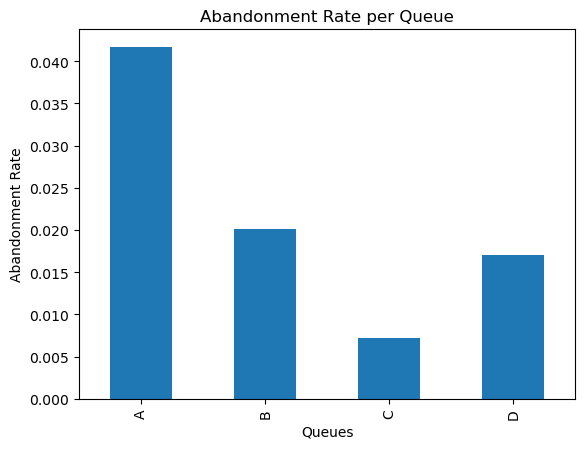

In [114]:
# Create visualization 1 here
# Import any additional libraries needed with alias
#barchart
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
#import matplotlib.pyplot as plt
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
df_abandonment_rates=pd.DataFrame(abandonment_rates,index=[1]).transpose()
df_abandonment_rates.plot(kind='bar', title="Abandonment Rate per Queue",legend=False, xlabel="Queues",ylabel="Abandonment Rate")





#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I've chosen a vertical bar chart here as well as we have categorical data here. It allows us to very clearly see who the best performers are in both of these instances.

In [119]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming_Wait_Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming_Wait_Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:


<Axes: title={'center': 'Average Speed per North Rep'}, xlabel='Rep', ylabel='Speed'>

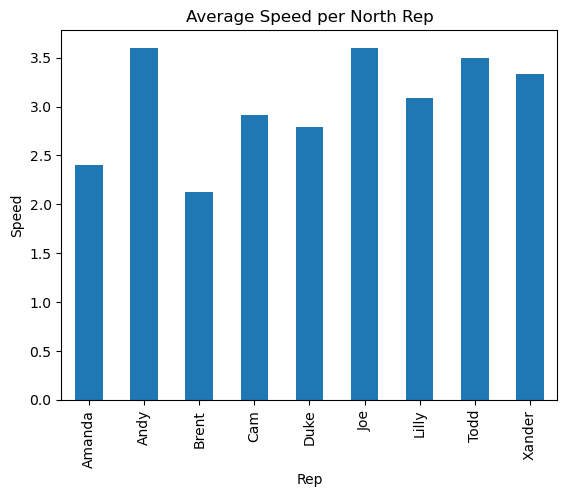

In [129]:
north_plt.plot(kind='bar', title="Average Speed per North Rep",legend=False, xlabel="Rep",ylabel="Speed",x="Rep ID")

<Axes: title={'center': 'Service Level per Rep'}, xlabel='Rep', ylabel='Service Level'>

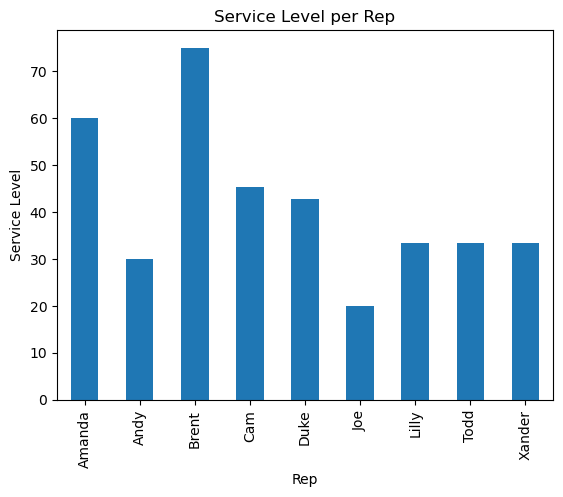

In [152]:
service_level.plot(kind='bar', title="Service Level per Rep",
                   legend=False, xlabel="Rep",ylabel="Service Level",y="Service Level %")
# service_level

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: grouped bar chart. I've chosen a grouped bar chart as we have categorical data again but in this instance there are two different groupings--incoming and outgoing, so it makes sense to group them together in order to be able to visually differentiate the number of call type & incoming/outgoing.

In [138]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<Axes: title={'center': '# Calls Incoming/Outgoing per Type of Call'}, xlabel='Type of Call: Incoming/Outgoing', ylabel='# calls'>

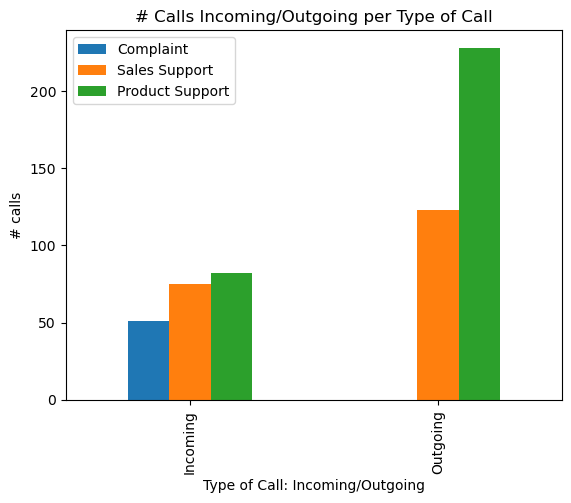

In [176]:
purpose_counts_df = pd.DataFrame([complaints,sales_support,product_support],index=["Complaint","Sales Support","Product Support"]).fillna(0).transpose()
purpose_counts_df.plot(kind='bar', title="# Calls Incoming/Outgoing per Type of Call",
                xlabel="Type of Call: Incoming/Outgoing",ylabel="# calls")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South Branch is operating more efficiently. Their abandonment rate is lower, service level is higher, and average speed of answer is lower.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The South Brand has more reps but also averages more calls per rep. The North branch would benefit from extra help in terms of people and also possibly training. CALC CALLS PER REP TO SEE


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: It would be good to know the amount of time spent per call to identify which agents maybe need training on strategies regarding addressing issues in a faster manner. Additionally, information on customer satisfaction would be useful as well as information on whether the issue was resolved (in particular for complaint calls).


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: